¡Hola, Robert!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Robert! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

Objetivo del proyecto:
Determinar la magnitud de ingresos que genera cada uno de los dos planes tarifarios de la empresa.

Acciones:
Contar cuantos clientes están subscritos en cada plan tarifario.
Sumar el total de ingresos que genera cada plan tarifario.
Sumar el total de ingresos excedentes al plan por cada plan tarifario.
Sumar la cantidad de llamadas, los minutos en llamada, numero de SMS y MB adicionales que gastaron los clientes de forma excedente a cada tipo de plan.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con la carga de math para el redondeo de las variables

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

Imprimir la informacion general de cada tabla asi como sus primeras lineas para identificar cualquier error en los datos que deban corregirse o limpiarse antes de ser procesados.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos de este DataFrame parecen estar en órden.
Los nombres de las columnas y los de tipo object dentro del DataFrame están en camel case.
Los datos fueron separados correctamente al importarse de un csv a un DataFrame de Pandas.
No existen datos ausentes ni repetidos.
Cada tipo de dato corresponde al esperado.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
Gracias por el comentario. Me gustaria conservar por el momento los datos en su unidad original que es mb y solo convertirlo a gb cuando sea necesario en su analisis.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Robert, claro solamente era una sugerencia para llevar un control pero es correcto realizar posteriormente

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Existen datos 466 datos ausentes en la columna "churn_date". Esto hace sentido, pues muchos de los usuarios no han abandonado sus planes y por eso no hay fecha de cancelación de sus servicios hasta el momento.
Los datos de las columnas "reg_date" y "churn_date" son de tipo object cuando deberían de ser Data Time. En el siguiente código haré la corrección de los mismos.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format='%Y-%m-%d')
print(users["churn_date"][users["churn_date"].notna()].head()) #este codigo es para verificar el formato de la columna
users["churn_date"] = pd.to_datetime(users["churn_date"], format='%Y-%m-%d')
print()
users.info()

6     2018-12-18
12    2018-11-16
22    2018-09-07
40    2018-12-30
50    2018-10-07
Name: churn_date, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [36]:
# Imprime una muestra de datos para las llamadas

calls.head()
calls[calls['duration']<1]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.00
25,1001_13,1001,2018-12-24,0.00
28,1001_23,1001,2018-10-27,0.98
31,1001_30,1001,2018-10-17,0.00
32,1001_31,1001,2018-11-03,0.00
...,...,...,...,...
137720,1499_189,1499,2018-12-27,0.00
137722,1499_191,1499,2018-12-24,0.00
137725,1499_194,1499,2018-10-31,0.00
137727,1499_196,1499,2018-11-22,0.27


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Casi todos los todos parecen estar en órden a excepción de la columna "call_date", la cual debería ser convertida al tipo DateTime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
    Es un punto interesante que no había considerado. Gracias por señalarlo.
    Debido a que se tienen registros de llamadas menores a 1 minuto es razonable pensar que sí se registran correctamente las llamadas que solo duran algunos segundos. Por lo tanto las llamadas que tienen 0 absoluto como duración entiendo que fueron intentos de llamada pero el receptor no logró contestar el teléfono. Según la descripción de los planes tarifarios, estos intentos de llamada no se cobran, o al menos no se menciona que se deban cobrar en ningún momento.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la interpretación

## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes

messages.sample(5)

,id,user_id,message_date
18392,1120_188,1120,2018-04-24
2144,1028_49,1028,2018-08-23
8452,1061_458,1061,2018-06-10
36859,1247_23,1247,2018-08-27
56952,1362_17,1362,2018-05-02


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Casi todos los todos parecen estar en órden a excepción de la columna "message_date", la cual debería ser convertida al tipo DateTime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(5)

,id,user_id,session_date,mb_used
87351,1405_55,1405,2018-06-23,421.04
80273,1374_349,1374,2018-05-16,823.26
2320,1011_60,1011,2018-07-17,114.31
28083,1128_237,1128,2018-10-11,36.04
58228,1263_32,1263,2018-11-15,886.27


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Casi todos los todos parecen estar en órden a excepción de la columna "session_date", la cual debería ser convertida al tipo DateTime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
Sí lo tengo contemplado. Más adelante tengo la conversión.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print('''Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.
     ''')
print()
print('''Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.''')

Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.
     

Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls.info()
user_calls_num = calls.groupby(['user_id', calls['call_date'].dt.month])['id'].count()
user_calls_num.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


user_id  call_date
1000     12            16
1001     8             27
         9             49
         10            65
         11            64
         12            56
1002     10            11
         11            55
         12            47
1003     12           149
Name: id, dtype: int64


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-info">
Es verdad, se pueden hacer representaciones interesantes con el método pivot_table. Gracias por resaltarlo. Lo tendré en cuenta para futuras operaciones ya que si lo utilizo ahora me cambiaria todo el ordenamiento de los datos y tendria que volver a hacer todo el analisis con este nuevo orden.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Claro, en futuras ocasiones puedes explorar esta herramienta

In [47]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
pivot_calls = calls.pivot_table(index=['user_id'],
                            columns=calls['call_date'].dt.month,
                            values=['duration'],
                            aggfunc=['sum','count'])
pivot_calls.head(15)

sum                                                      \
          duration                                                       
call_date       1   2       3       4       5       6       7       8    
user_id                                                                  
1000           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1001           NaN NaN     NaN     NaN     NaN     NaN     NaN  171.14   
1002           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1003           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1004           NaN NaN     NaN     NaN  181.58  261.32  358.45  334.86   
1005           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1006           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1007           NaN NaN     NaN     NaN     NaN     NaN     NaN  427.95   
1008           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1009           NaN NaN     NaN     NaN  498.93  775.52  826.74  680.39   
1010           NaN NaN  408.42  618.43  497.94  524.14  658.24  598.94   
1011           NaN NaN     NaN     NaN     NaN  111.68  472.66  460.12   
1012           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1013           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1014           NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                           ...    count                                   \
                           ... duration                                    
call_date      9       10  ...       3     4     5      6      7      8    
user_id                    ...                                             
1000          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1001       297.69  374.11  ...      NaN   NaN   NaN    NaN    NaN   27.0   
1002          NaN   54.13  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1003          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1004       284.60  341.63  ...      NaN   NaN  21.0   44.0   49.0   49.0   
1005          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1006          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1007       375.83  610.65  ...      NaN   NaN   NaN    NaN    NaN   70.0   
1008          NaN  450.21  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1009       730.47  696.35  ...      NaN   NaN  71.0  110.0  124.0  109.0   
1010       568.75  668.63  ...     63.0  90.0  81.0   77.0  101.0   93.0   
1011       455.22  476.99  ...      NaN   NaN   NaN   19.0   63.0   61.0   
1012          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1013          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   
1014          NaN     NaN  ...      NaN   NaN   NaN    NaN    NaN    NaN   

                                       
                                       
call_date     9      10     11     12  
user_id                                
1000         NaN    NaN    NaN   16.0  
1001        49.0   65.0   64.0   56.0  
1002         NaN   11.0   55.0   47.0  
1003         NaN    NaN    NaN  149.0  
1004        42.0   61.0   54.0   50.0  
1005         NaN    NaN    NaN   59.0  
1006         NaN    NaN    2.0    9.0  
1007        63.0   80.0   80.0   87.0  
1008         NaN   71.0   63.0   85.0  
1009       116.0  114.0  105.0  107.0  
1010        83.0   95.0   30.0    NaN  
1011        73.0   76.0   65.0   56.0  
1012         NaN    NaN   10.0   16.0  
1013         NaN    NaN    NaN   35.0  
1014         NaN    NaN   28.0  150.0  

[15 rows x 24 columns]

In [50]:
user_calls_min = calls.groupby(['user_id', calls['call_date'].dt.month])['duration'].sum()
user_calls_min

user_id  call_date
1000     12           116.83
1001     8            171.14
         9            297.69
         10           374.11
         11           404.59
                       ...  
1498     12           324.77
1499     9            330.37
         10           363.28
         11           288.56
         12           468.10
Name: duration, Length: 2258, dtype: float64

In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages.info()
user_messages_num = messages.groupby(['user_id', calls['call_date'].dt.month])['id'].count()
user_messages_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


user_id  call_date
1000     12           11
1001     8            21
         9            39
         10           52
         11           48
Name: id, dtype: int64

In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet.info()
user_mb = internet.groupby(['user_id', calls['call_date'].dt.month])['mb_used'].sum()
user_mb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


user_id  call_date
1000     12            1901.47
1001     8             7131.50
         9            13311.04
         10           20406.45
         11           20873.07
Name: mb_used, dtype: float64

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_expends = pd.merge(user_calls_num, user_calls_min, how='outer', on=['user_id', 'call_date'])
merged_expends = pd.merge(merged_expends, user_messages_num, how='outer', on=['user_id', 'call_date'])
merged_expends = pd.merge(merged_expends, user_mb, how='outer', on=['user_id', 'call_date'])
merged_expends.columns = ['calls_count', 'calls_duration', 'message_count', 'mb_used']

merged_expends.fillna(0, inplace=True)
print(merged_expends)
print()
merged_expends.info()

                   calls_count  calls_duration  message_count   mb_used
user_id call_date                                                      
1000    12                16.0          116.83           11.0   1901.47
1001    8                 27.0          171.14           21.0   7131.50
        9                 49.0          297.69           39.0  13311.04
        10                65.0          374.11           52.0  20406.45
        11                64.0          404.59           48.0  20873.07
...                        ...             ...            ...       ...
1495    8                  0.0            0.00            0.0  14337.64
1499    5                  0.0            0.00            0.0   3482.36
        6                  0.0            0.00            0.0  11588.41
        7                  0.0            0.00            0.0   6775.95
        8                  0.0            0.00            0.0   9488.37

[4310 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [24]:
# Añade la información de la tarifa

users.info()
plan_map = dict(zip(users['user_id'], users['plan']))
print()
merged_expends['plan'] = merged_expends.index.get_level_values('user_id').map(plan_map)
merged_expends.head()
plan_fee_map = {'surf': 20, 'ultimate': 70}
merged_expends['plan_fee'] = merged_expends['plan'].map(plan_fee_map)
print(merged_expends.head(10))
print()
merged_expends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

                   calls_count  calls_duration  message_count   mb_used  \
user_id call_date                                                         
1000    12                16.0          116.83           11.0   1901.47   
1001    8                 27.0          171.14           21.0   7131.50   
        9                 49.0          297.6

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [51]:
# Calcula el ingreso mensual para cada usuario
def user_monthly_profit(row):
    extra_calls_charge = 0
    extra_message_count_charge = 0
    extra_gb_used_charge = 0
    if row['plan'] == 'ultimate':
        extra_calls_time = row['calls_duration']-3000
        if extra_calls_time >0:
            extra_time_fee = 0.01 #tarifa por minutos de llamadas extra
            extra_calls_charge = extra_calls_time * extra_time_fee
        else:
            extra_calls_charge = 0
        extra_message_count = row['message_count']-1000
        if extra_message_count >0:
            extra_mesage_count_fee = 0.01 #tarifa por SMS excedidos
            extra_message_count_charge = extra_message_count * extra_mesage_count_fee
        else:
            extra_message_count_charge = 0
        extra_gb_used = math.ceil(row['mb_used']/1000) - 30 #Se convierte mb a gb y se redondea hacia arriba
        if extra_gb_used >0:
            extra_gb_used_fee = 7 #Tarifa por gb excedido
            extra_gb_used_charge = extra_gb_used * extra_gb_used_fee
        else:
            extra_gb_used_charge = 0
        total_month_charge = extra_calls_charge + extra_message_count_charge + extra_gb_used_charge + row['plan_fee']
        return total_month_charge
    elif row['plan'] == 'surf':
        extra_calls_time = row['calls_duration']-500
        if extra_calls_time >0:
            extra_time_fee = 0.03 #tarifa por minutos de llamadas extra
            extra_calls_charge = extra_calls_time * extra_time_fee
        extra_message_count = row['message_count']-50
        if extra_message_count >0:
            extra_mesage_count_fee = 0.03 #tarifa por SMS excedidos
            extra_message_count_charge = extra_message_count * extra_mesage_count_fee
        extra_gb_used = math.ceil(row['mb_used']/1024) - 15 #Se convierte mb a gb y se redondea hacia arriba
        if extra_gb_used >0:
            extra_gb_used_fee = 10 #Tarifa por gb excedido
            extra_gb_used_charge = extra_gb_used * extra_gb_used_fee
        total_month_charge = extra_calls_charge + extra_message_count_charge + extra_gb_used_charge + row['plan_fee']
        return total_month_charge
    
merged_expends['total_month_charge'] = merged_expends.apply(user_monthly_profit, axis=1)

merged_expends.head(10)



calls_count  calls_duration  message_count   mb_used  \
user_id call_date                                                         
1000    12                16.0          116.83           11.0   1901.47   
1001    8                 27.0          171.14           21.0   7131.50   
        9                 49.0          297.69           39.0  13311.04   
        10                65.0          374.11           52.0  20406.45   
        11                64.0          404.59           48.0  20873.07   
        12                56.0          392.93           47.0  18715.88   
1002    10                11.0           54.13           16.0   7210.80   
        11                55.0          359.76           33.0  18238.99   
        12                47.0          363.24           23.0  12526.43   
1003    12               149.0         1041.00           22.0  24440.03   

                       plan  plan_fee  total_month_charge  \
user_id call_date                                           
1000    12         ultimate        70               70.00   
1001    8              surf        20               20.00   
        9              surf        20               20.00   
        10             surf        20               70.06   
        11             surf        20               80.00   
        12             surf        20               60.00   
1002    10             surf        20               20.00   
        11             surf        20               50.00   
        12             surf        20               20.00   
1003    12             surf        20              126.23   

                                                    city  
user_id call_date                                         
1000    12         Atlanta-Sandy Springs-Roswell, GA MSA  
1001    8                Seattle-Tacoma-Bellevue, WA MSA  
        9                Seattle-Tacoma-Bellevue, WA MSA  
        10               Seattle-Tacoma-Bellevue, WA MSA  
        11               Seattle-Tacoma-Bellevue, WA MSA  
        12               Seattle-Tacoma-Bellevue, WA MSA  
1002    10          Las Vegas-Henderson-Paradise, NV MSA  
        11          Las Vegas-Henderson-Paradise, NV MSA  
        12          Las Vegas-Henderson-Paradise, NV MSA  
1003    12                                 Tulsa, OK MSA

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar a cuánto equivale un gb para cuando hagas la transformación.

</div>

<div class="alert alert-block alert-info">
Gracias por sugerirme verificar la equivalencia entre gb mb. Ironicamente no son 1000 sino 1024 la proporcion de conversion. Ya corregí esta proporción en el código anterior.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan      call_date
surf      1             12.856000
          2             36.109429
          3             54.597786
          4             80.674757
          5            116.132400
          6            137.628084
          7            167.320228
          8            196.004625
          9            234.112531
          10           292.246474
          11           343.728723
          12           428.605843
ultimate  1             36.632500
          2             71.865676
          3             50.417941
          4             63.910288
          5             94.290508
          6            122.694925
          7            166.589301
          8            185.569145
          9            230.796818
          10           294.560850
          11           344.520323
          12           416.464331
Name: calls_duration, dtype: float64


<AxesSubplot:xlabel='Plan & Month', ylabel='minutes mean'>

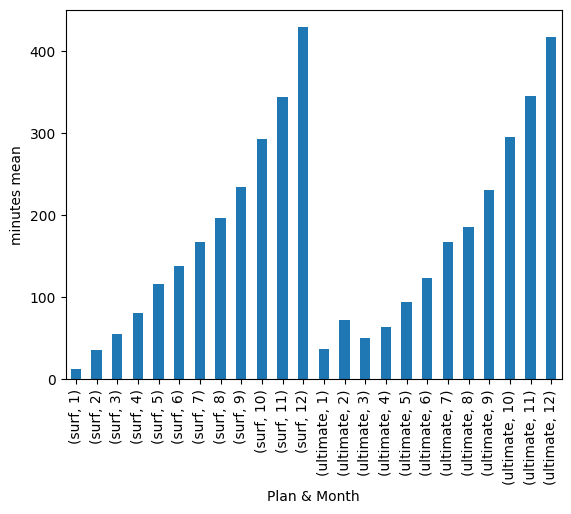

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_duration = merged_expends.groupby(['plan', 'call_date'])['calls_duration'].mean()
print(avg_duration)
avg_duration.plot(kind='bar', ylabel='minutes mean', xlabel='Plan & Month')


In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_var_calls = merged_expends.groupby(['plan', 'call_date'])['calls_duration'].agg([np.mean, np.var])
print(mean_var_calls)

                          mean           var
plan     call_date                          
surf     1           12.856000   2903.850666
         2           36.109429  14410.109000
         3           54.597786  19490.173414
         4           80.674757  31308.571228
         5          116.132400  46686.116965
         6          137.628084  50912.842265
         7          167.320228  64522.640756
         8          196.004625  62123.316498
         9          234.112531  61686.482402
         10         292.246474  66879.074750
         11         343.728723  58902.180912
         12         428.605843  62685.065644
ultimate 1           36.632500   8017.332336
         2           71.865676  34172.546581
         3           50.417941  20950.216715
         4           63.910288  22330.959362
         5           94.290508  36921.340219
         6          122.694925  41191.866691
         7          166.589301  66275.315622
         8          185.569145  61649.606783
         9

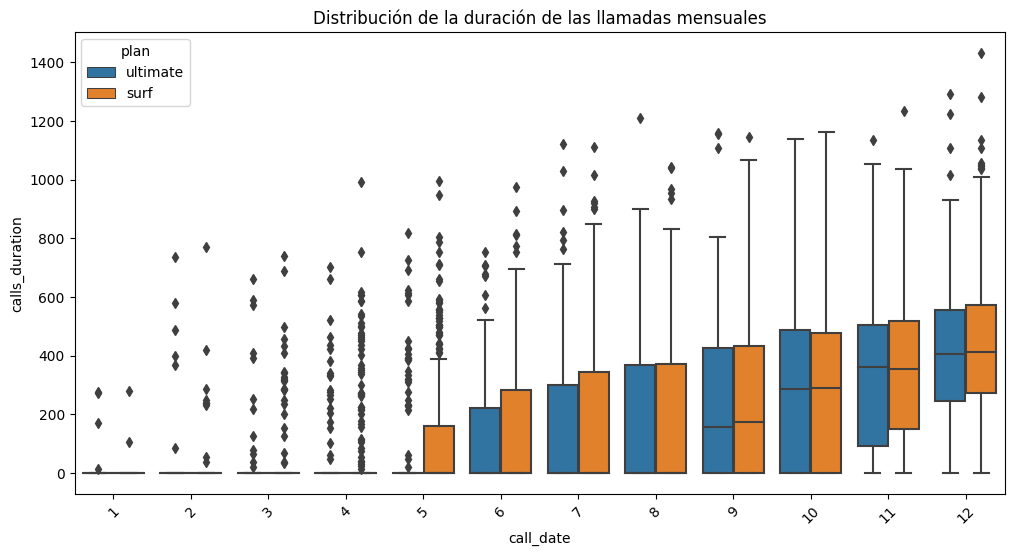

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_expends.index.get_level_values('call_date'), y='calls_duration', hue=('plan'), data=merged_expends)
plt.title('Distribución de la duración de las llamadas mensuales')
plt.xticks(rotation=45)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
El comportamiento de consumo de minutos en llamada es muy similar entre los usuarios de ambos planes

### Mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
plan      call_date
surf      1             2.433333
          2             5.442857
          3             4.435115
          4             6.281553
          5             9.464000
          6            10.282230
          7            13.244300
          8            15.156250
          9            17.549383
          10           22.753799
          11           25.768997
          12           32.536145
ultimate  1             2.850000
          2             4.270270
          3             6.573529
          4             7.134615
          5            10

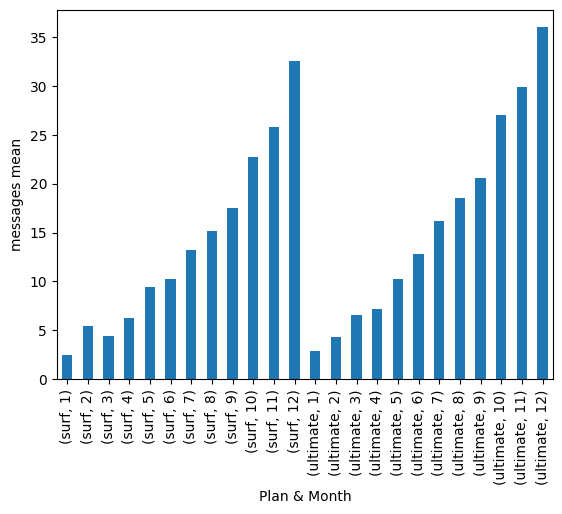

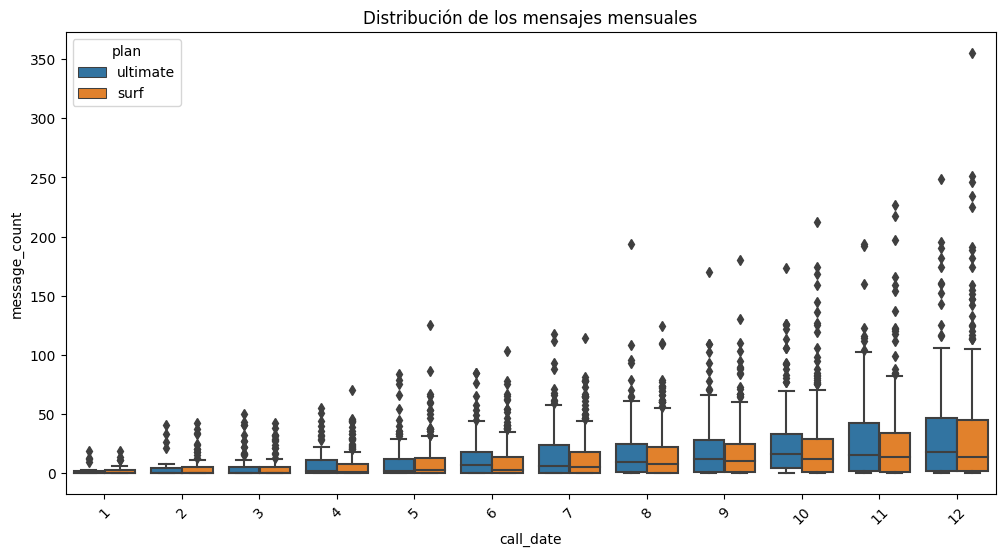

In [30]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages.info()
messages_num_mean = merged_expends.groupby(['plan', 'call_date'])['message_count'].mean()
print(messages_num_mean)
messages_num_mean.plot(kind='bar', ylabel='messages mean', xlabel='Plan & Month')
print()
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_expends.index.get_level_values('call_date'), y='message_count', hue=('plan'), data=merged_expends)
plt.title('Distribución de los mensajes mensuales')
plt.xticks(rotation=45)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
plan      call_date
surf      1             1469.808000
          2             2440.690429
          3             2482.415802
          4             3322.963155
          5             5168.915960
          6             5614.155575
          7             7262.757622
          8             8388.410813
          9             9818.320648
          10           12160.753131
          11           13335.450881
          12           16369.499337
ultimate  1             1080.038000
          2    

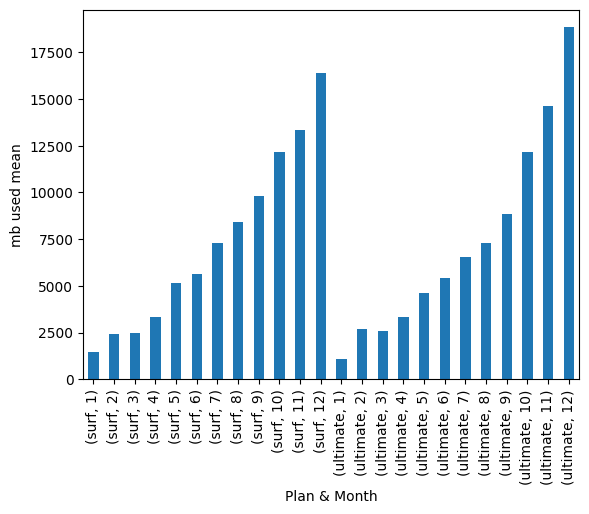

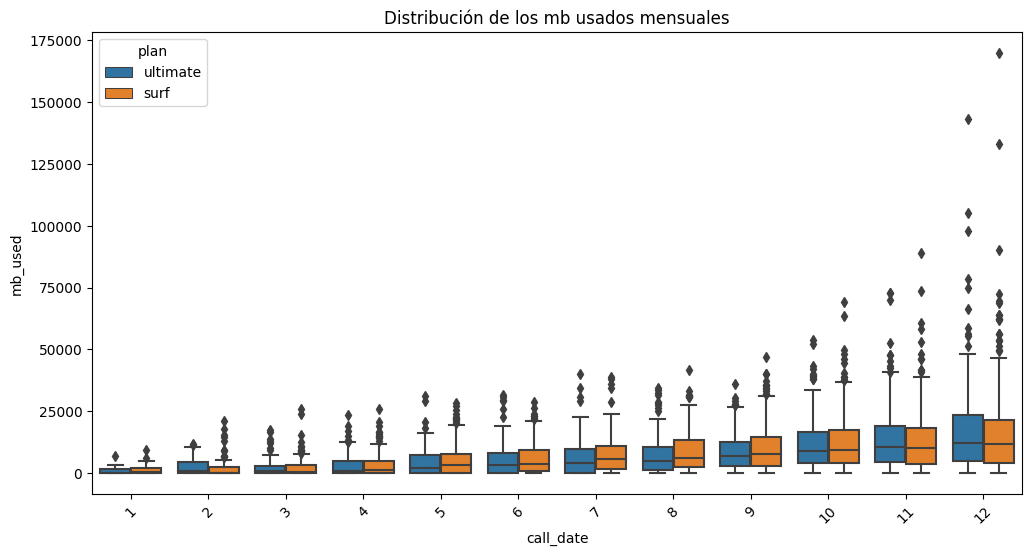

In [31]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet.info()
mb_used_mean = merged_expends.groupby(['plan', 'call_date'])['mb_used'].mean()
print(mb_used_mean)
mb_used_mean.plot(kind='bar', ylabel='mb used mean', xlabel='Plan & Month')
print()
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_expends.index.get_level_values('call_date'), y='mb_used', hue=('plan'), data=merged_expends)
plt.title('Distribución de los mb usados mensuales')
plt.xticks(rotation=45)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
El consumo de mensajes es muy similar entre los usuarios que se encuentran en un plan en comparación del otro.

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
El consumo de internet en mb es muy similar entre los usuarios que se encuentran en un plan en comparación del otro.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

plan      call_date
surf      1             20.000000
          2             21.686723
          3             21.700656
          4             21.605461
          5             24.769948
          6             24.553942
          7             28.995814
          8             32.672109
          9             39.467027
          10            54.453526
          11            64.348523
          12            92.530375
ultimate  1             70.000000
          2             70.000000
          3             70.000000
          4             70.000000
          5             70.118644
          6             70.156716
          7             70.832168
          8             70.644737
          9             70.318182
          10            76.359477
          11            84.316129
          12           101.522293
Name: total_month_charge, dtype: float64



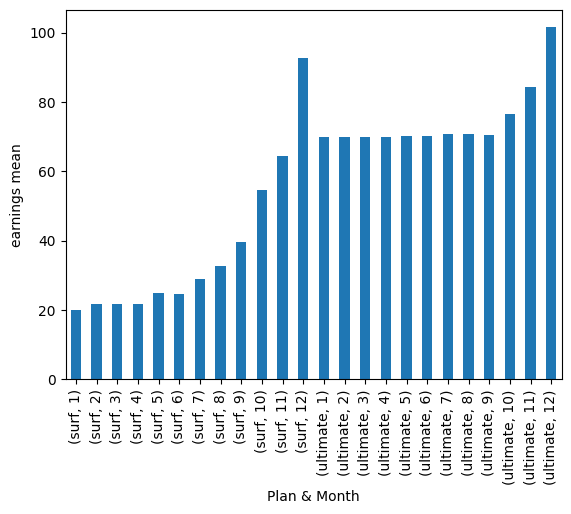

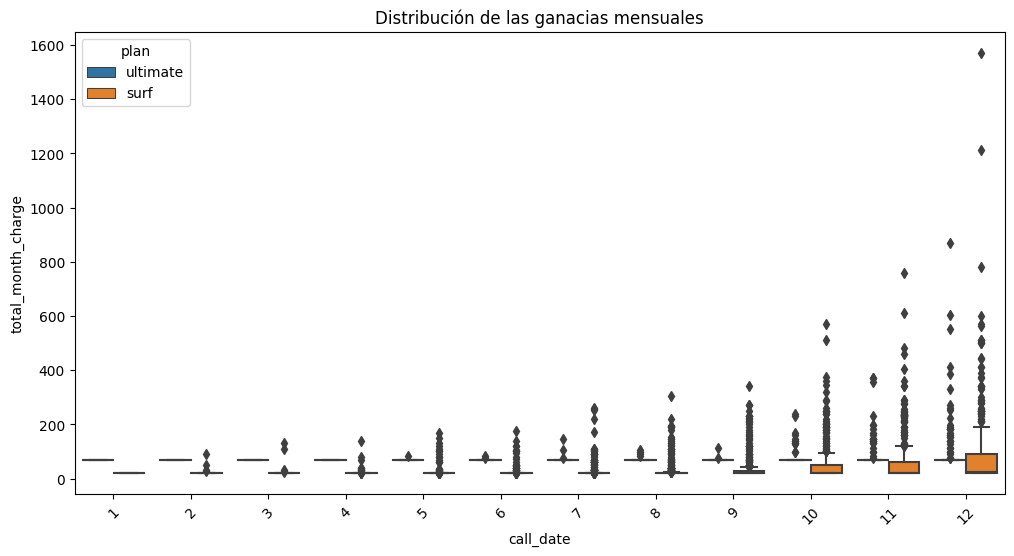

In [32]:

earnings_mean = merged_expends.groupby(['plan', 'call_date'])['total_month_charge'].mean()
print(earnings_mean)
earnings_mean.plot(kind='bar', ylabel='earnings mean', xlabel='Plan & Month')
print()
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_expends.index.get_level_values('call_date'), y='total_month_charge', hue=('plan'), data=merged_expends)
plt.title('Distribución de las ganacias mensuales')
plt.xticks(rotation=45)
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
Los ingresos del plan Ultimate son superiores a los del plan surf en cada uno de los meses del año.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [33]:
# Prueba las hipótesis
merged_expends.info()
def apply_shapiro(group):
    # Realizar la prueba de Shapiro-Wilk sobre el grupo
    estadistico, p_value = shapiro(group['total_month_charge'])
    
    # Devolver los resultados
    return pd.Series({
        'estadistico': estadistico,
        'p_value': p_value
    })
shapiro_results = merged_expends.groupby(['plan', 'call_date']).apply(apply_shapiro)
print(shapiro_results)
print()
merged_expends.groupby(['plan', 'call_date']).head()
merging_ultimate = merged_expends[merged_expends['plan']=='ultimate']
merging_ultimate.rename(columns={'total_month_charge': 'ultimate_total_month_charge'}, inplace=True)
merging_surf = merged_expends[merged_expends['plan']=='surf']
merging_surf.rename(columns={'total_month_charge': 'surf_total_month_charge'}, inplace=True)
comparing_merged_expends = pd.merge(merging_ultimate, merging_surf, how='outer', on=['call_date'])
comparing_merged_expends.drop(columns=['calls_count_x', 'calls_duration_x', 'message_count_x', 'mb_used_x', 'plan_x', 'plan_fee_x', 'calls_count_y', 'calls_duration_y', 'message_count_y', 'mb_used_y', 'plan_y', 'plan_fee_y'], inplace=True)
comparing_merged_expends.info()
print(comparing_merged_expends.head(20))
mannwhitneyu(comparing_merged_expends['ultimate_total_month_charge'], comparing_merged_expends['surf_total_month_charge'])
comparing_merged_expends.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4310 entries, (1000, 12) to (1499, 8)
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   calls_count         4310 non-null   float64
 1   calls_duration      4310 non-null   float64
 2   message_count       4310 non-null   float64
 3   mb_used             4310 non-null   float64
 4   plan                4310 non-null   object 
 5   plan_fee            4310 non-null   int64  
 6   total_month_charge  4310 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 268.8+ KB
                    estadistico       p_value
plan     call_date                           
surf     1             1.000000  1.000000e+00
         2             0.186155  8.604009e-18
         3             0.119715  1.500836e-24
         4             0.147574  1.540112e-29
         5             0.263745  2.422169e-30
         6             0.277657  6.029350e-32
       

/opt/conda/envs/python3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ultimate_total_month_charge,surf_total_month_charge
count,397373.000000,397373.000000
mean,77.012384,45.489400
std,42.340832,78.952607
min,70.000000,20.000000
25%,70.000000,20.000000
50%,70.000000,20.000000
75%,70.000000,25.719800
max,868.000000,1570.000000


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [34]:
# Prueba las hipótesis
city_map = dict(zip(users['user_id'], users['city']))
merged_expends['city'] = merged_expends.index.get_level_values('user_id').map(city_map)
len(merged_expends['city'].unique())
ny_nj_merged_expends = merged_expends[merged_expends['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
print(ny_nj_merged_expends['total_month_charge'].describe())
print(ny_nj_merged_expends['total_month_charge'].sum())
print()
not_ny_nj_merged_expends = merged_expends[merged_expends['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']
print(not_ny_nj_merged_expends['total_month_charge'].describe())
print(not_ny_nj_merged_expends['total_month_charge'].sum())
not_ny_nj_merged_expends
print(shapiro(ny_nj_merged_expends['total_month_charge']))#aplicamos una prueba de normalidad para saber que tipo de prueba de hipotesis usar
print(shapiro(not_ny_nj_merged_expends['total_month_charge']))
mannwhitneyu(not_ny_nj_merged_expends['total_month_charge'], ny_nj_merged_expends['total_month_charge'])

count    695.000000
mean      54.288251
std       74.212650
min       20.000000
25%       20.000000
50%       20.480000
75%       70.000000
max      781.568100
Name: total_month_charge, dtype: float64
37730.3344

count    3615.000000
mean       53.378363
std        65.535216
min        20.000000
25%        20.000000
50%        23.312000
75%        70.000000
max      1570.000000
Name: total_month_charge, dtype: float64
192962.7812
ShapiroResult(statistic=0.47948944568634033, pvalue=8.381586504666028e-41)
ShapiroResult(statistic=0.45398372411727905, pvalue=0.0)


MannwhitneyuResult(statistic=1311855.0, pvalue=0.047895811490935226)

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el desarrollo de las pruebas de hipótesis. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
El plan Ultimate genera más ganacias por cada usuario que el plan surf, evidenciado por una prueba de hipotesis estadística no paramétrica con una p < 0.05.
Los usuarios que encuentran en el área NY-NJ generan por cada usuario menos ganancias que en el resto de la población. Ésto es evidenciado por una prueba de hipotesis no paramétrica con una significancia estadística de una p < 0.05.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Robert, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar la tranformación a gb

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    

</div>